In [2]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import os
import shutil


from google.colab import drive
from zipfile import ZipFile
from keras.applications.vgg16 import VGG16

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# mount google drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
# path of zip file contain cat and dog images
file = "gdrive/My Drive/python/PetImages.zip"

In [6]:
# ekstrak zip file to google colab directory
with ZipFile(file, 'r') as zipObj:
  zipObj.extractall()

In [7]:
# check list of directory google colab after mount google drive and extract zip file
print(os.listdir())

['.config', 'PetImages', 'gdrive', 'sample_data']


In [8]:
# delete corrupt images
num_skipped = 0
for folder_name in ("Cat", "Dog"):
  folder_path = os.path.join("PetImages", folder_name)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
      fobj = open(fpath, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num_skipped += 1
      os.remove(fpath)

  print("Deleted %d images" % num_skipped)

Deleted 759 images
Deleted 1590 images


In [9]:
# store path of cat and dog images folder in google colab
data_dir = pathlib.Path('PetImages')

In [10]:
# count images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

23410


In [11]:
batch_size = 32
img_height = 224
img_width = 224

In [12]:
# extract training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.


In [13]:
class_names_train = train_ds.class_names
print(class_names_train)

['Cat', 'Dog']


In [14]:
# extract test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [15]:
class_names_test = test_ds.class_names
print(class_names_test)

['Cat', 'Dog']


In [16]:
# normalisasi data
def normalize(image, label):
  image = tf.cast(image, tf.float32);
  image /= 255.
  return image, label

In [17]:
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

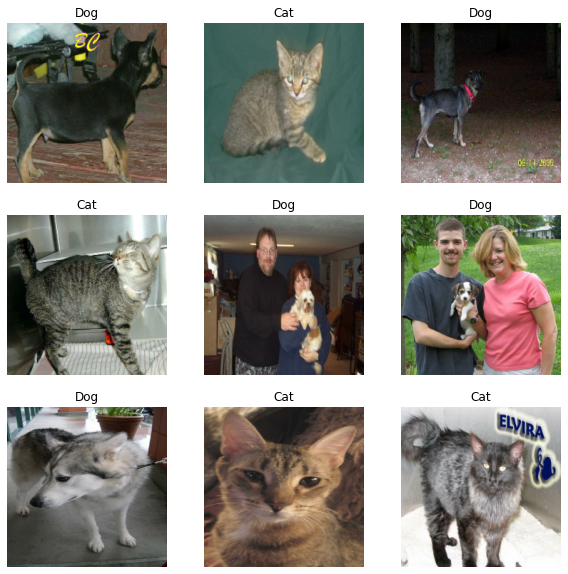

In [18]:
# visualisasi train data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype("float32"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

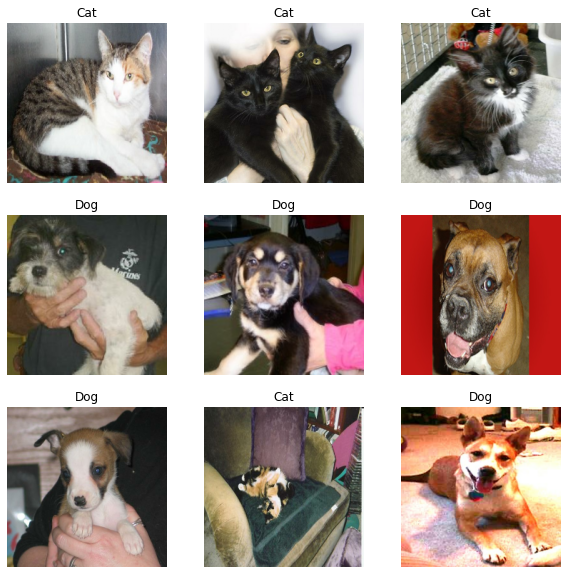

In [19]:
# visualisasi test data
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype("float32"))
    plt.title(class_names_test[labels[i]])
    plt.axis("off")

In [21]:
# create model
model = VGG16(include_top=True, weights=None, classes=1, classifier_activation=None)

In [22]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
# training model
history = model.fit(train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
586/586 [==============================] - 323s 462ms/step - loss: 5.9663e-08 - accuracy: 0.4995 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 2/25
586/586 [==============================] - 265s 452ms/step - loss: 5.9636e-08 - accuracy: 0.4997 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 3/25
586/586 [==============================] - 265s 451ms/step - loss: 5.9704e-08 - accuracy: 0.4992 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 4/25
586/586 [==============================] - 265s 452ms/step - loss: 5.9793e-08 - accuracy: 0.4984 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 5/25
586/586 [==============================] - 265s 452ms/step - loss: 5.9765e-08 - accuracy: 0.4987 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 6/25
586/586 [==============================] - 265s 452ms/step - loss: 5.9781e-08 - accuracy: 0.4985 - val_loss: 6.0878e-08 - val_accuracy: 0.4893
Epoch 7/25
586/586 [==============================] - 265s 452ms/step - loss